In [1]:
import os
os.cpu_count()

12

In [2]:
#!pip install klib
#!pip install vecstack
#!pip install catboost
#!pip install lightgbm

In [3]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RepeatedStratifiedKFold


# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from bayes_opt import BayesianOptimization

# Modeling
#from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from itertools import combinations
from catboost import Pool
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import ensemble, metrics
from sklearn.linear_model import ARDRegression, BayesianRidge
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet


# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
from vecstack import stacking

C:\Users\lhj02\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Read data

In [4]:
#df = pd.read_csv('totaldata.csv')
#df = df.drop('Unnamed: 0',axis='columns')
#df

In [5]:
main_df=pd.read_csv('Totaldata.csv',index_col="Date")
sup_df=pd.read_csv('supportindexscaled_000210.csv',index_col="Date")
df=pd.merge(main_df,sup_df,on="Date")
df=df.drop([df.columns[0],"ma_5","ma_20","ma_60","ma_120"],axis=1)
df

,Open,High,Low,Close,Volume,Change,C-Close,C-Change,Difference,C-Difference,MACD,BOL_H,BOL_L
Date,,,,,,,,,,,,,
1998-05-04,1761,1769,1685,1753,176170,0.000000,1347.00,0.802682,0,10.726036,0.520748,0.001456,0.006457
1998-05-06,1746,1784,1677,1730,193140,-1.312037,1368.50,1.596140,-23,21.500000,0.520654,0.001518,0.006240
1998-05-07,1719,1807,1685,1806,169580,4.393064,1401.50,2.411399,76,33.000000,0.520892,0.001850,0.006120
1998-05-08,1715,1807,1715,1753,65930,-2.934662,1387.00,-1.034606,-53,-14.500000,0.520860,0.001795,0.006154
1998-05-11,1753,1753,1600,1707,146200,-2.624073,1390.50,0.252343,-46,3.500000,0.520646,0.001791,0.006024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,69300,72700,68500,70900,234995,2.308802,1287.51,-1.105308,1600,-14.390000,0.573156,0.378227,0.391208
2022-07-01,71800,73000,70400,71300,180673,0.564175,1298.67,0.866789,400,11.160000,0.584427,0.380621,0.390471
2022-07-04,71600,72000,68700,70100,80246,-1.683029,1295.87,-0.215605,-1200,-2.800000,0.587628,0.381238,0.390312


1-2 속성간 유사성 시각화(corr)

Displaying absolute correlations above the threshold (0.3). Specify a positive "threshold" to further limit the results.


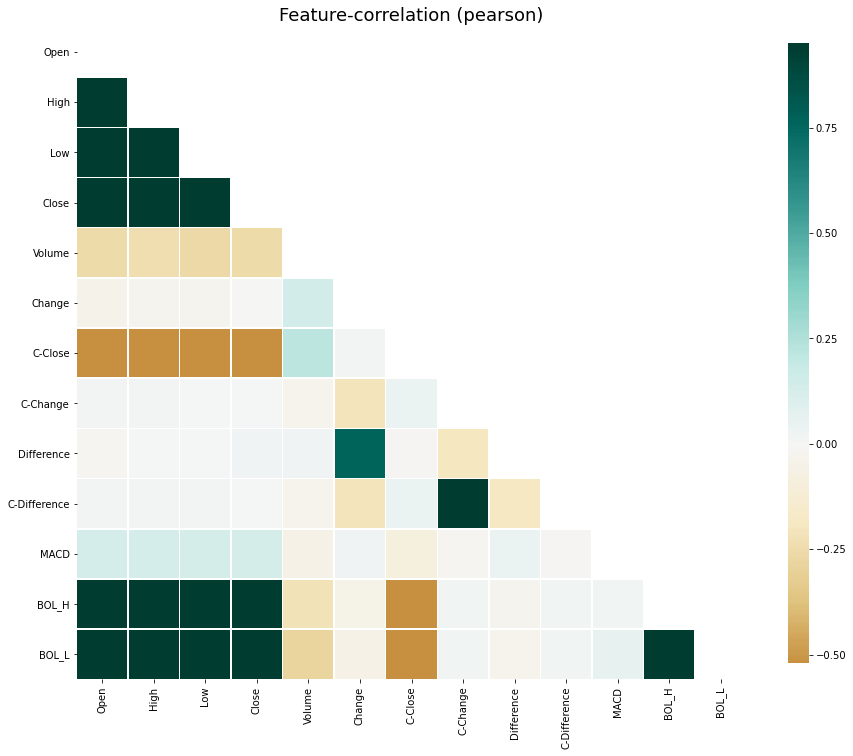

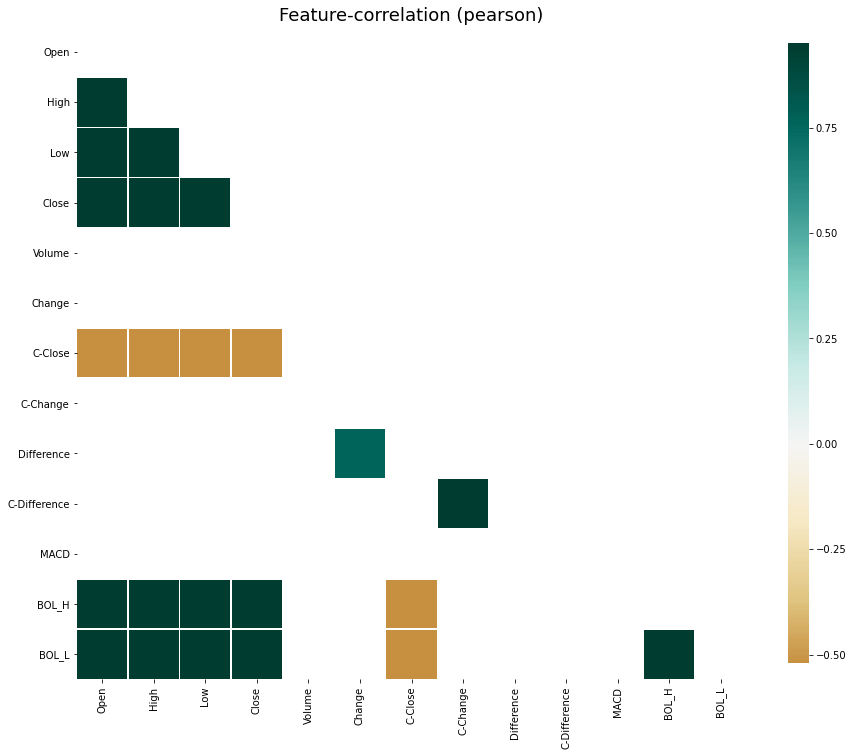

In [6]:
klib.corr_plot(df, annot=False, figsize=(15,12))
klib.corr_plot(df, split='high', annot=False, figsize=(15,12))

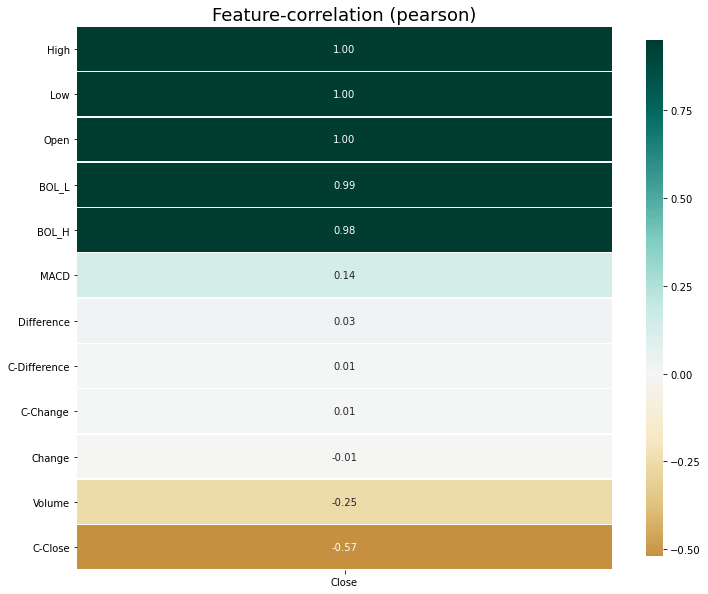

In [7]:
klib.corr_plot(df, target='Close') #알고싶은 열과 나머지 속성들이 어느정도의 상관성을 가지는지 시각화

In [8]:
#df = df.drop('Date',axis = 'columns')
X = df.copy()
X = X.drop('Close',axis = 'columns')
y = df['Close']
y = pd.DataFrame(y)
#X_train = X[:3350]
#X_dev = X[3350:]
#y_train = y[:3350]
#y_dev = y[3350:]
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, shuffle =False, random_state=0)

In [9]:
rf = RandomForestRegressor(random_state=0, n_jobs=4)
gbm = GradientBoostingRegressor(random_state=0)
lgbm = lightgbm.LGBMRegressor(random_state=0 ,n_jobs=4)
xgb = XGBRegressor(
    max_depth=15,
    n_estimators=150,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)
lr = LinearRegression(n_jobs=4)
cb = CatBoostRegressor(random_state=0 )
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.2)
ridge = Ridge(alpha=1)
lasso = Lasso()
ard = ARDRegression()
bayesian = BayesianRidge()

models = [rf, gbm, lgbm, xgb, lr , ridge,lasso,ard, bayesian,elasticnet]

scores = cross_val_score(model, X_train, y_train) #내부적으로 fit
#scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
#scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5), scoring='r2')
#scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(r2_score))
#scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5), scoring=make_scorer(r2_score))

In [10]:
X_train= X_train.reset_index(drop=True)
X_dev= X_dev.reset_index(drop=True)
y_dev = y_dev.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_dev = y_dev.values
y_train = y_train.values
y_dev = np.array(y_dev).flatten().tolist()
y_train = np.array(y_train).flatten().tolist()

In [11]:
ts = time.time()

model = XGBRegressor(
    max_depth=15,
    n_estimators=150,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    y_train, 
    eval_metric='rmse', 
    eval_set=[(X_train, y_train), (X_dev, y_dev)], 
    verbose=True,
    early_stopping_rounds = 10)

time.time() - ts

[0]	validation_0-rmse:46490.67188	validation_1-rmse:52887.66406
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:32905.55859	validation_1-rmse:37083.82812
[2]	validation_0-rmse:23499.26367	validation_1-rmse:25984.69922
[3]	validation_0-rmse:17011.16211	validation_1-rmse:18232.44141
[4]	validation_0-rmse:12637.45312	validation_1-rmse:12821.61426
[5]	validation_0-rmse:9685.38574	validation_1-rmse:9173.23633
[6]	validation_0-rmse:7816.56885	validation_1-rmse:6660.85791
[7]	validation_0-rmse:6645.87939	validation_1-rmse:4923.74463
[8]	validation_0-rmse:5889.51318	validation_1-rmse:3708.36694
[9]	validation_0-rmse:5466.23438	validation_1-rmse:2934.13501
[10]	validation_0-rmse:5222.11963	validation_1-rmse:2503.68188
[11]	validation_0-rmse:5057.05029	validation_1-rmse:2117.50000
[12]	validation_0-rmse:4927.77344	validation_1-rmse:1947.46851
[13]	validation_0-rmse

0.5743701457977295

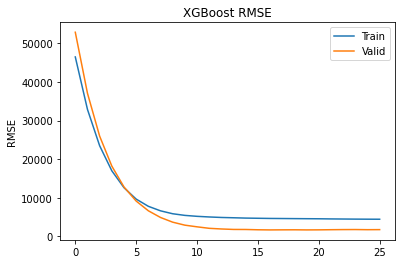

In [12]:
results = model.evals_result()
epochs = len(results['validation_1']['rmse'])
x_axis = range(0, epochs)
# plot rmse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Valid')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

In [13]:
xgb_train_pred = model.predict(X_train)
xgb_val_pred = model.predict(X_dev)

In [14]:
print('Train rmse:', np.sqrt(mean_squared_error(y_train, xgb_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_dev, xgb_val_pred)))

Train rmse: 4674.884373054945
Validation rmse: 1703.6594085231704


캣부스트

ts = time.time()

model = CatBoostRegressor(
      random_state = 42,
      learning_rate = 0.01,
      bagging_temperature =  0.01,
      n_estimators = 1000,
      max_depth = 16,
      random_strength = 100,
      colsample_bylevel =  0.4,
      l2_leaf_reg = 3e-5,
      min_child_samples =  5,
      max_bin =  200,
      od_type = 'IncToDec')

model.fit(
    X_train, 
    y_train,  
    eval_set=[(X_train, y_train), (X_dev, y_dev)], 
    verbose=True,
    early_stopping_rounds = 10)

time.time() - ts

catboost_model = CatBoostRegressor(
    iterations=1500,
    max_ctr_complexity=3,
    random_seed=0,
    od_wait=30,
    verbose=50,
    depth=5,
    learning_rate=0.2
)

catboost_model.fit(
    X_train, y_train,
    eval_set=(X_dev, y_dev)
)

catboost_train_pred = catboost_model.predict(X_train)
catboost_val_pred = catboost_model.predict(X_dev)

print('Train rmse:', np.sqrt(mean_squared_error(y_train, catboost_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_dev, catboost_val_pred)))

In [15]:
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=9, random_state=0, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_val_pred = rf_model.predict(X_dev)

In [16]:
print('Train rmse:', np.sqrt(mean_squared_error(y_train, rf_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_dev, rf_val_pred)))

Train rmse: 451.59213555048086
Validation rmse: 632.7739036920864


In [17]:
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [18]:
lr_train_pred = lr_model.predict(X_train)
lr_val_pred = lr_model.predict(X_dev)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lr_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_dev, lr_val_pred)))

Train rmse: 639.2309957391539
Validation rmse: 511.71950777606367


In [19]:
my_predictions = {}


colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]



def plot_predictions(name_, actual, pred):
    df = pd.DataFrame({'actual': y_dev, 'prediction': pred})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def rmse_eval(name_, actual, pred):
    global predictions
    global colors

    plot_predictions(name_, actual, pred)

    rmse = np.sqrt(mean_squared_error(actual, pred))
    my_predictions[name_] = rmse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'rmse'])
    print(df)
    min_ = df['rmse'].min() - 10
    max_ = df['rmse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['rmse'])
    
    for i, v in enumerate(df['rmse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('RMSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

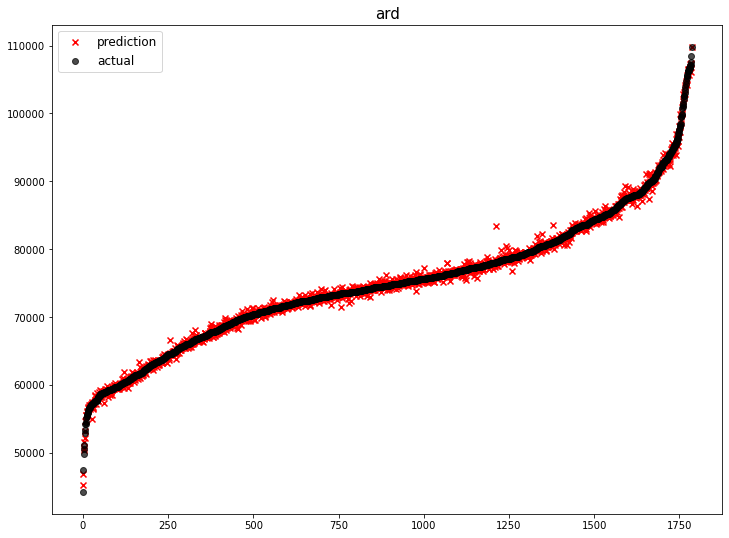

  model        rmse
0   ard  513.006051


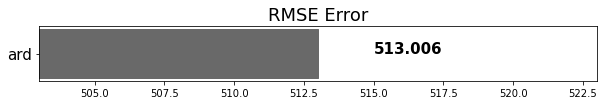

In [20]:
ard = ARDRegression(alpha_1=0.01, alpha_2=0.01, lambda_1=1e-06, lambda_2=1e-06)
ard.fit(X_train, y_train)
ard_pred = ard.predict(X_dev)
rmse_eval('ard', y_dev, ard_pred)

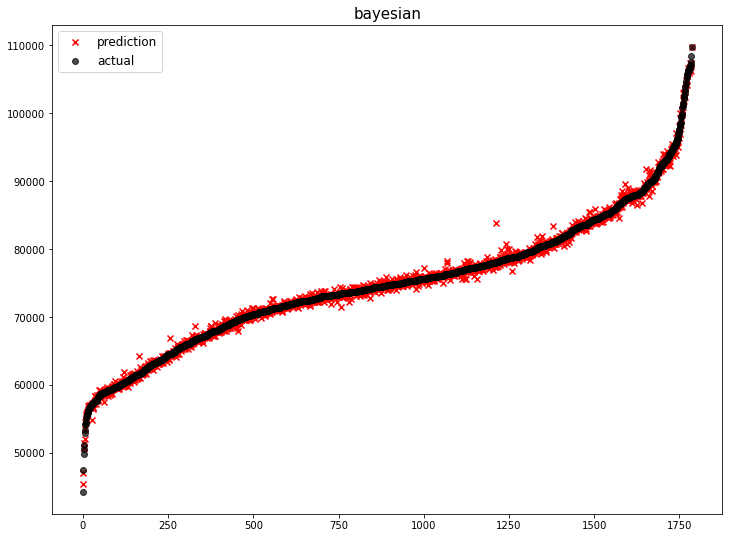

      model        rmse
0  bayesian  524.388120
1       ard  513.006051


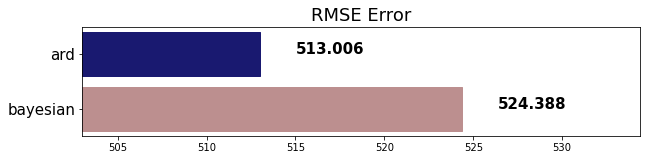

In [21]:
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_pred = bayesian.predict(X_dev)
rmse_eval('bayesian', y_dev, bayesian_pred)

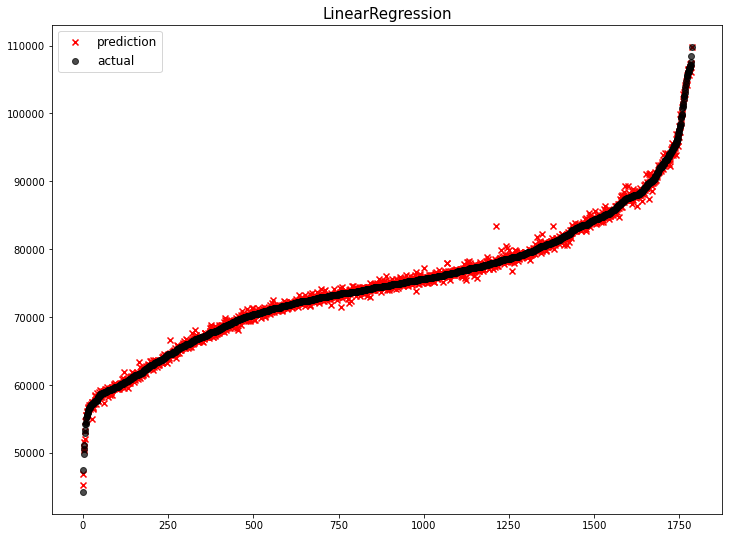

              model        rmse
0          bayesian  524.388120
1               ard  513.006051
2  LinearRegression  511.719508


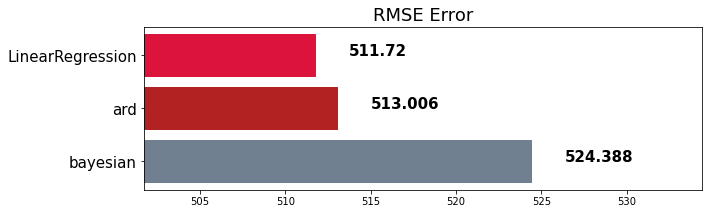

In [22]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_dev)
rmse_eval('LinearRegression', y_dev, linear_pred)

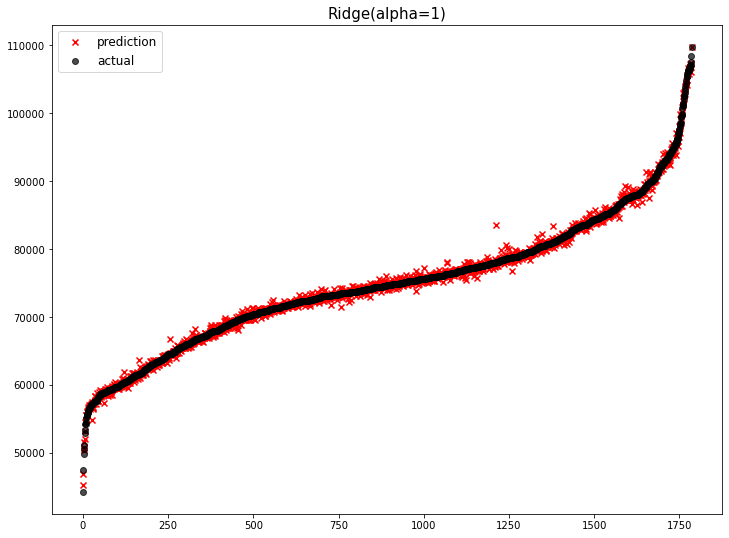

              model        rmse
0          bayesian  524.388120
1    Ridge(alpha=1)  513.634231
2               ard  513.006051
3  LinearRegression  511.719508


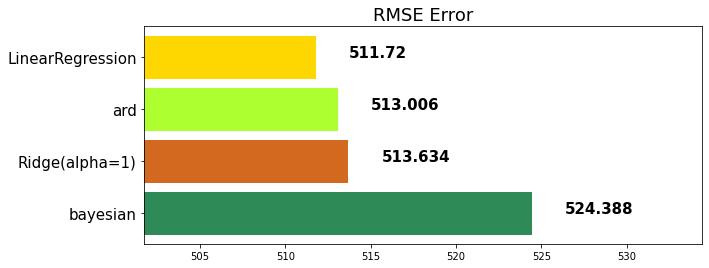

In [23]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_dev)
rmse_eval('Ridge(alpha=1)', y_dev, ridge_pred)

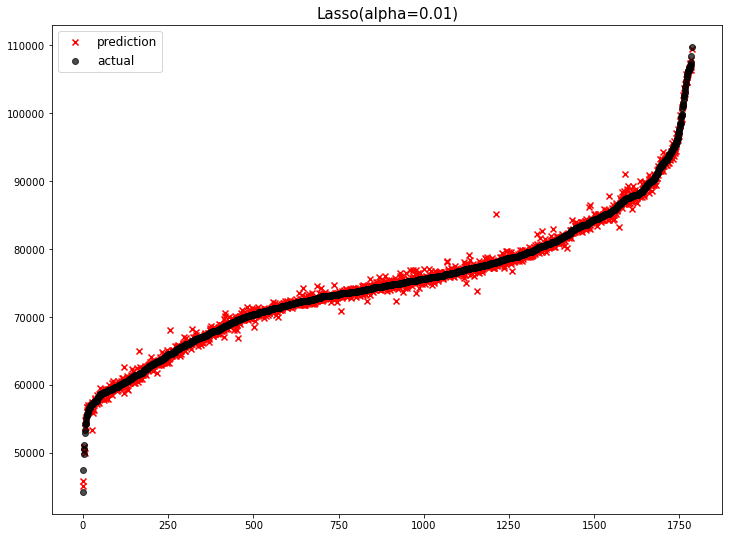

               model        rmse
0  Lasso(alpha=0.01)  630.411340
1           bayesian  524.388120
2     Ridge(alpha=1)  513.634231
3                ard  513.006051
4   LinearRegression  511.719508


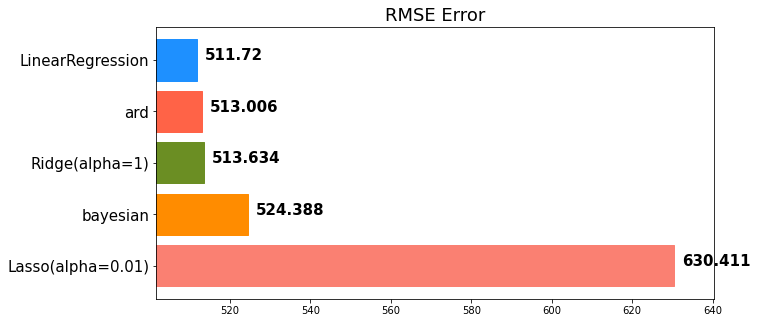

In [24]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_dev)
rmse_eval('Lasso(alpha=0.01)', y_dev, lasso_pred)

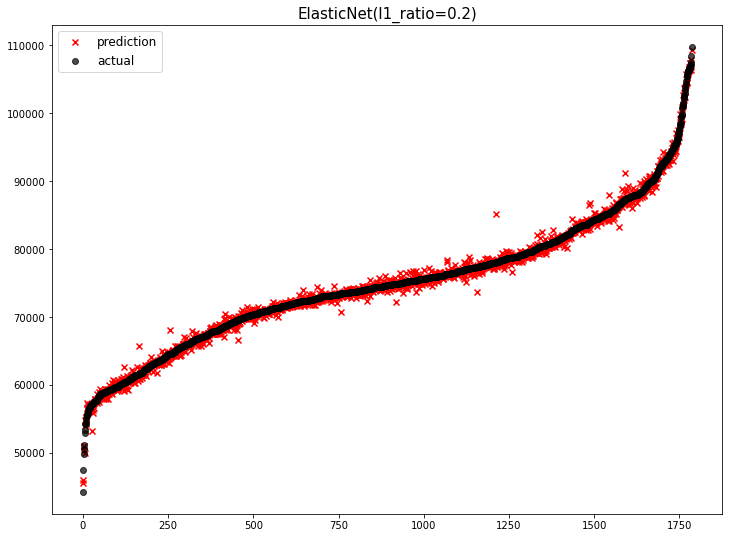

                      model        rmse
0  ElasticNet(l1_ratio=0.2)  641.473180
1         Lasso(alpha=0.01)  630.411340
2                  bayesian  524.388120
3            Ridge(alpha=1)  513.634231
4                       ard  513.006051
5          LinearRegression  511.719508


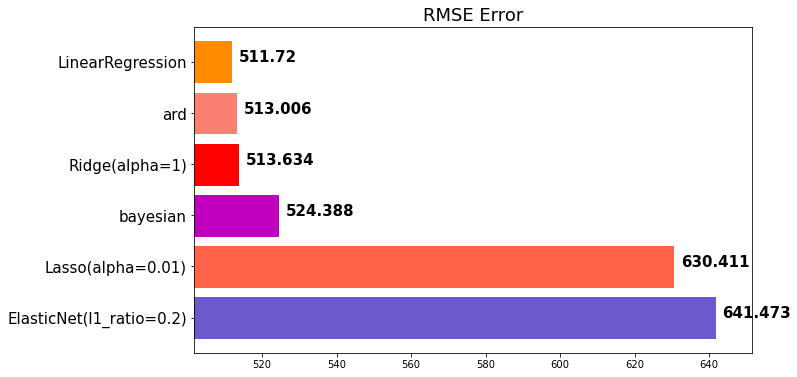

In [25]:
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.2)
elasticnet.fit(X_train, y_train)
elas_pred = elasticnet.predict(X_dev)
rmse_eval('ElasticNet(l1_ratio=0.2)', y_dev, elas_pred)

catboost = CatBoostRegressor(
    iterations=1500,
    max_ctr_complexity=3,
    random_seed=0,
    od_wait=30,
    verbose=50,
    depth=5,
    learning_rate=0.2
)

catboost.fit(X_train, y_train)
cat_pred = catboost.predict(X_dev)
mse_eval('catboost', y_dev, cat_pred)

In [26]:
single_models = [
    ('lr ', lr),
    ('ridge', ridge),
    ('lasso', lasso),
    ('elasticnet', elasticnet)
]
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

voting_regressor.fit(X_train, y_train)


VotingRegressor(estimators=[('lr ', LinearRegression(n_jobs=4)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet',
                             ElasticNet(alpha=0.5, l1_ratio=0.2))],
                n_jobs=-1)

보팅 앙상블(회귀버전)

In [27]:
VotingRegressor(estimators=[('linear_reg',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=-1, normalize=False)),
                            ('ridge',
                             Ridge(alpha=1, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001)),
                            ('ard',
                            ARDRegression())],
                                                         
                            
                n_jobs=-1, weights=None)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('ard', ARDRegression())],
                n_jobs=-1)

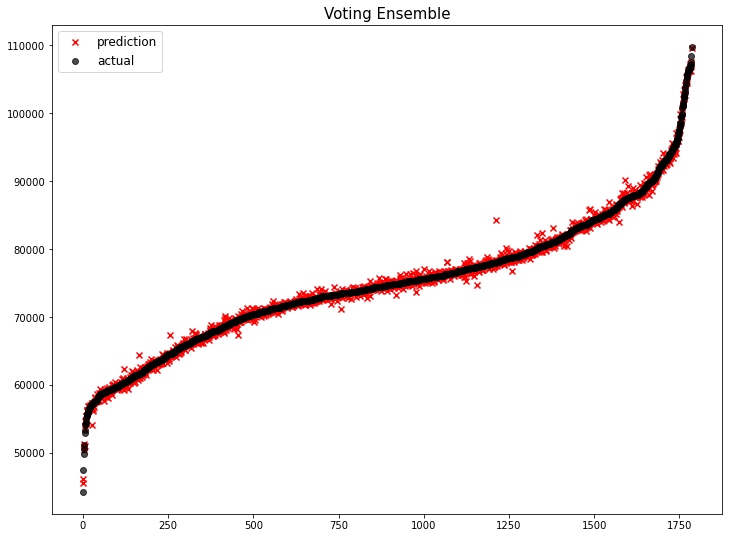

                      model        rmse
0  ElasticNet(l1_ratio=0.2)  641.473180
1         Lasso(alpha=0.01)  630.411340
2           Voting Ensemble  541.630941
3                  bayesian  524.388120
4            Ridge(alpha=1)  513.634231
5                       ard  513.006051
6          LinearRegression  511.719508


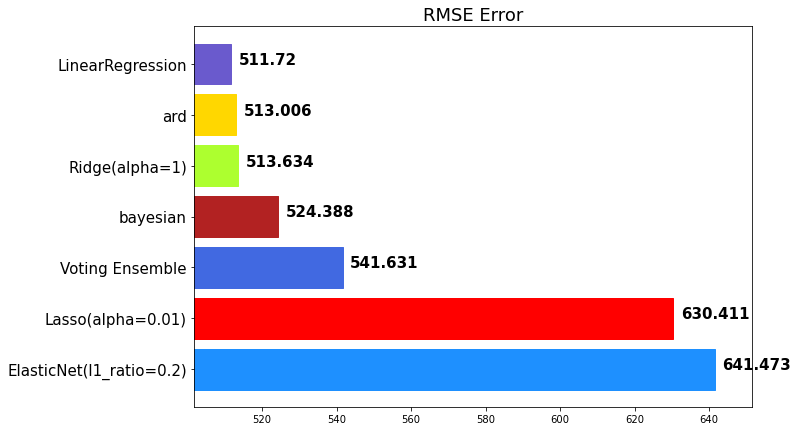

In [28]:
voting_pred = voting_regressor.predict(X_dev)
rmse_eval('Voting Ensemble', y_dev, voting_pred)

랜덤포레스트 앙상블

In [29]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

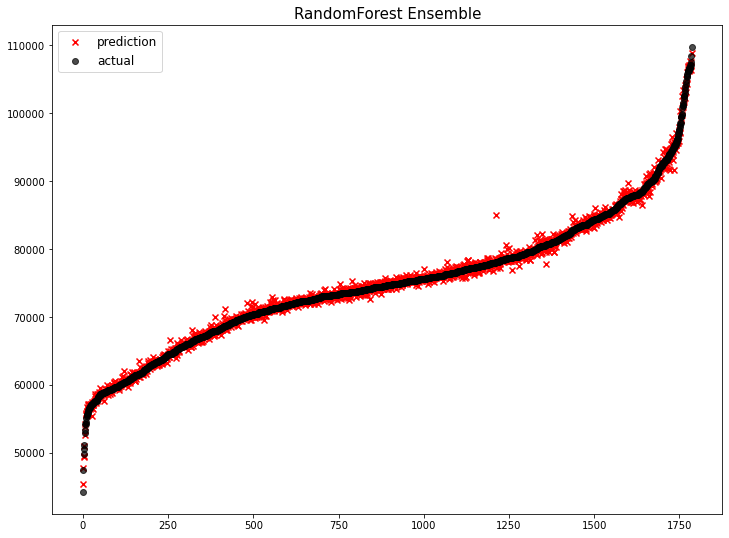

                      model        rmse
0  ElasticNet(l1_ratio=0.2)  641.473180
1         Lasso(alpha=0.01)  630.411340
2     RandomForest Ensemble  601.296241
3           Voting Ensemble  541.630941
4                  bayesian  524.388120
5            Ridge(alpha=1)  513.634231
6                       ard  513.006051
7          LinearRegression  511.719508


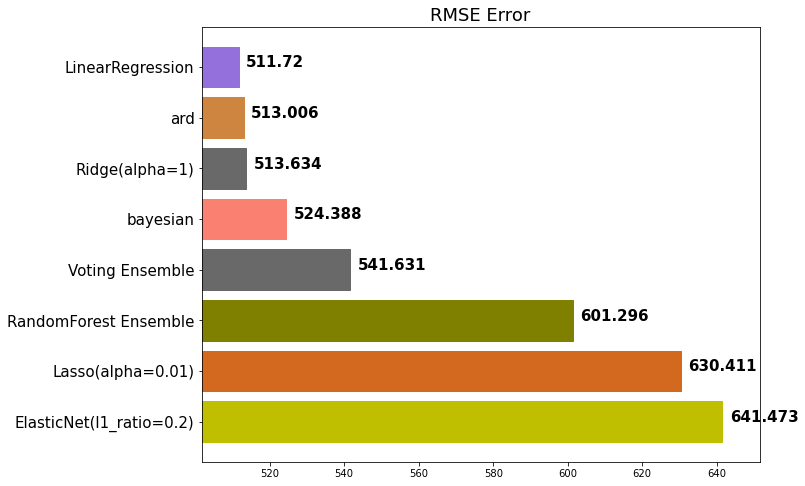

In [30]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='rmse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

rfr_pred = rfr.predict(X_dev)
rmse_eval('RandomForest Ensemble', y_dev, rfr_pred)

In [31]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [32]:
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [33]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 8}


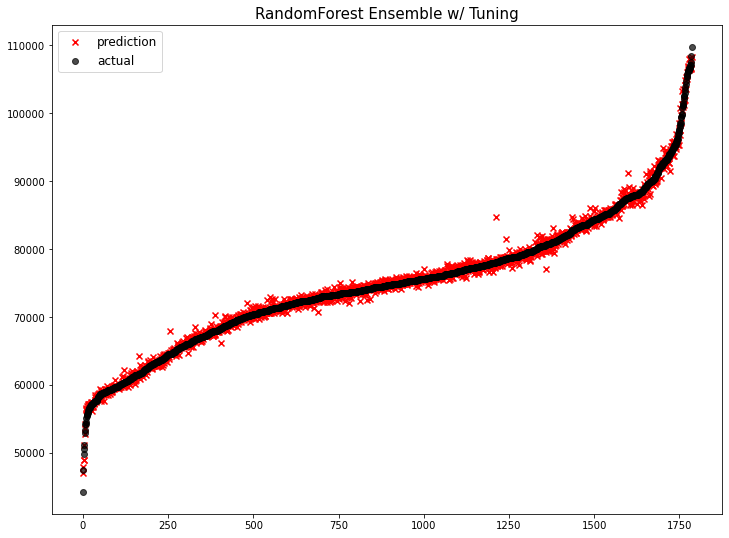

                             model        rmse
0  RandomForest Ensemble w/ Tuning  653.845099
1         ElasticNet(l1_ratio=0.2)  641.473180
2                Lasso(alpha=0.01)  630.411340
3            RandomForest Ensemble  601.296241
4                  Voting Ensemble  541.630941
5                         bayesian  524.388120
6                   Ridge(alpha=1)  513.634231
7                              ard  513.006051
8                 LinearRegression  511.719508


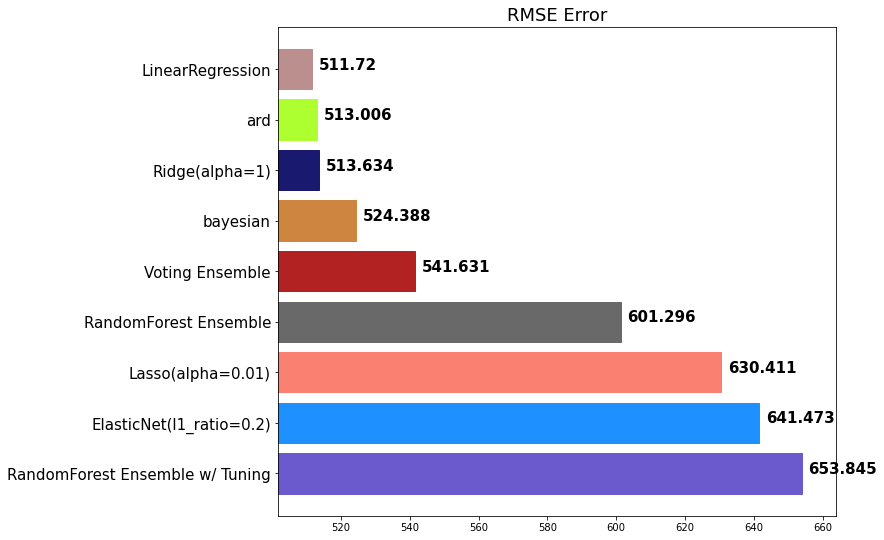

In [34]:
rfr_t = RandomForestRegressor(bootstrap = True, max_depth = None,random_state =50,max_features = "auto", n_estimators = 8)
rfr_t.fit(X_train, y_train)
rfr_t_pred = rfr_t.predict(X_dev)
rmse_eval('RandomForest Ensemble w/ Tuning', y_dev, rfr_t_pred)

그레디언트 부스팅 앙상블 (회귀버전)

In [35]:
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, #presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(random_state=1)

In [36]:
gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

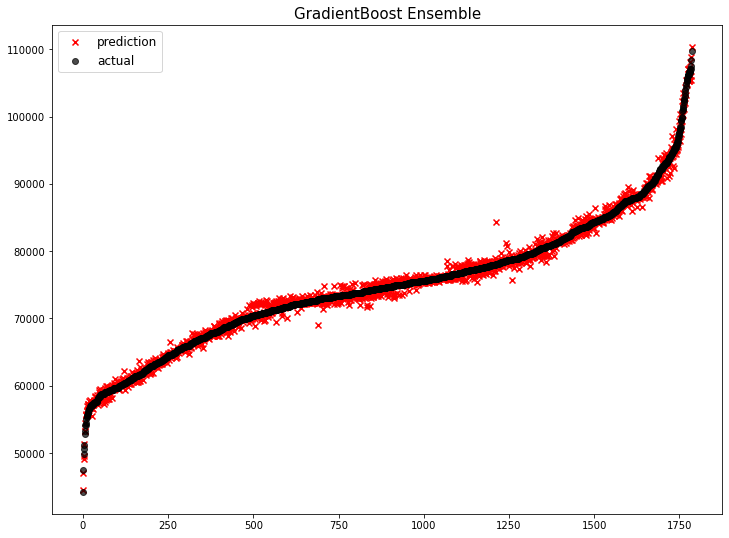

                             model        rmse
0           GradientBoost Ensemble  750.514377
1  RandomForest Ensemble w/ Tuning  653.845099
2         ElasticNet(l1_ratio=0.2)  641.473180
3                Lasso(alpha=0.01)  630.411340
4            RandomForest Ensemble  601.296241
5                  Voting Ensemble  541.630941
6                         bayesian  524.388120
7                   Ridge(alpha=1)  513.634231
8                              ard  513.006051
9                 LinearRegression  511.719508


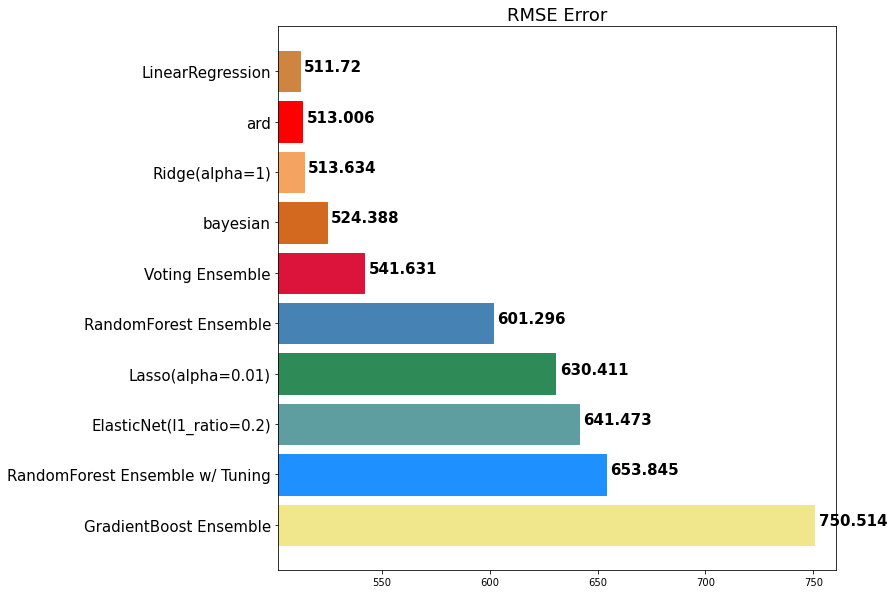

In [37]:
gbr_pred = gbr.predict(X_dev)
rmse_eval('GradientBoost Ensemble', y_dev, gbr_pred)

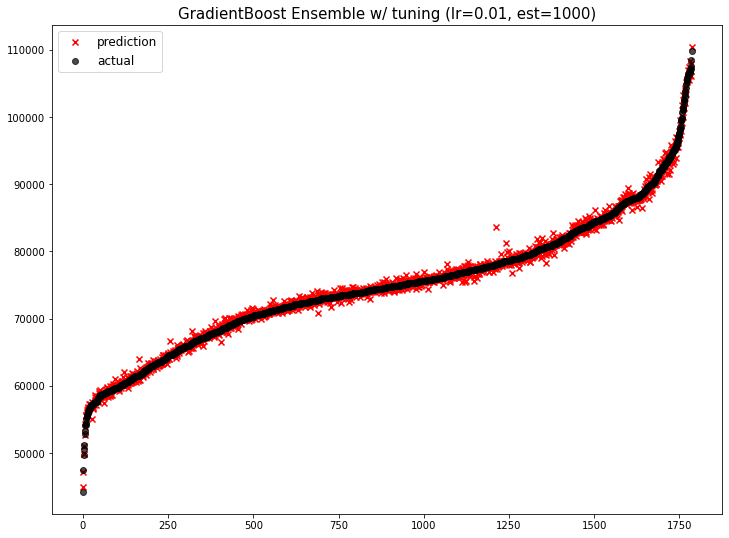

                                                model        rmse
0                              GradientBoost Ensemble  750.514377
1                     RandomForest Ensemble w/ Tuning  653.845099
2                            ElasticNet(l1_ratio=0.2)  641.473180
3                                   Lasso(alpha=0.01)  630.411340
4                               RandomForest Ensemble  601.296241
5   GradientBoost Ensemble w/ tuning (lr=0.01, est...  583.388974
6                                     Voting Ensemble  541.630941
7                                            bayesian  524.388120
8                                      Ridge(alpha=1)  513.634231
9                                                 ard  513.006051
10                                   LinearRegression  511.719508


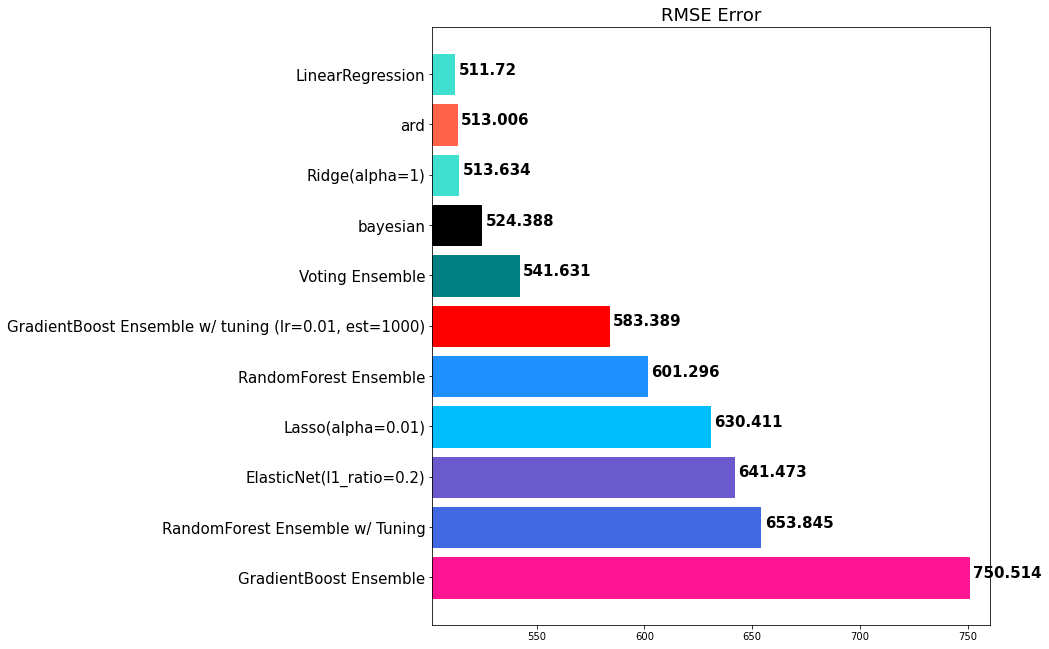

In [38]:
gbr_t2 = GradientBoostingRegressor(random_state=1, learning_rate=0.01, n_estimators=1000)
gbr_t2.fit(X_train, y_train)
gbr_t2_pred = gbr_t2.predict(X_dev)
rmse_eval('GradientBoost Ensemble w/ tuning (lr=0.01, est=1000)', y_dev, gbr_t2_pred)

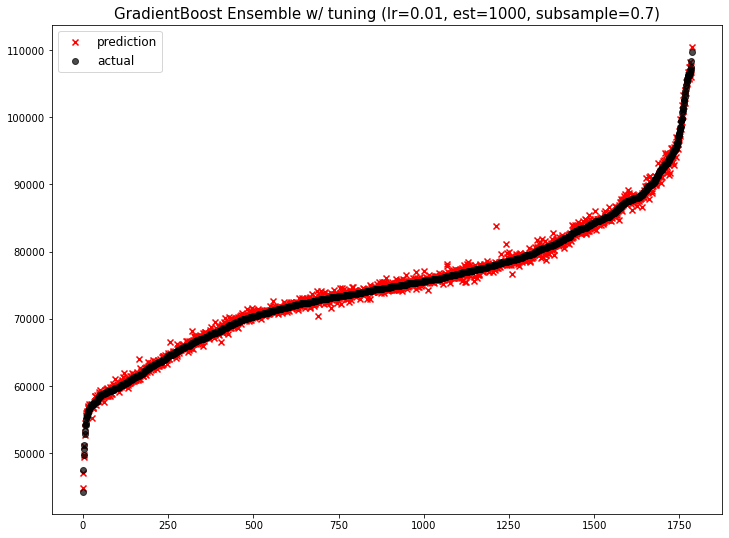

                                                model        rmse
0                              GradientBoost Ensemble  750.514377
1                     RandomForest Ensemble w/ Tuning  653.845099
2                            ElasticNet(l1_ratio=0.2)  641.473180
3                                   Lasso(alpha=0.01)  630.411340
4                               RandomForest Ensemble  601.296241
5   GradientBoost Ensemble w/ tuning (lr=0.01, est...  583.388974
6   GradientBoost Ensemble w/ tuning (lr=0.01, est...  579.949584
7                                     Voting Ensemble  541.630941
8                                            bayesian  524.388120
9                                      Ridge(alpha=1)  513.634231
10                                                ard  513.006051
11                                   LinearRegression  511.719508


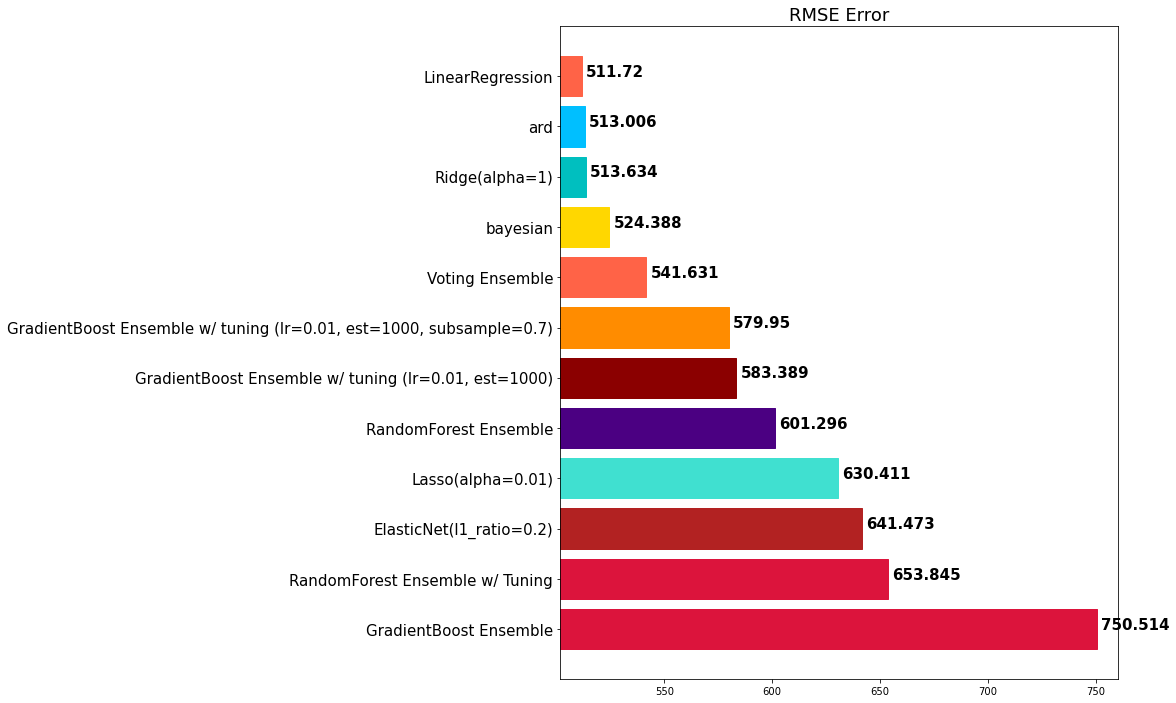

In [39]:
gbr_t3 = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.7)
gbr_t3.fit(X_train, y_train)
gbr_t3_pred = gbr_t3.predict(X_dev)
rmse_eval('GradientBoost Ensemble w/ tuning (lr=0.01, est=1000, subsample=0.7)', y_dev, gbr_t3_pred)

xg부스터 앙상블(회귀버전)

In [40]:
xgb = XGBRegressor(random_state=1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, #missing=NAN, 
             monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

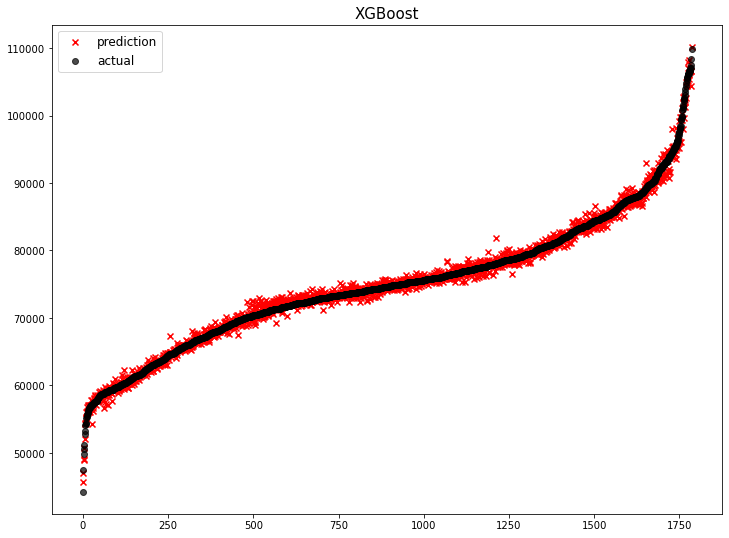

                                                model        rmse
0                                             XGBoost  751.768070
1                              GradientBoost Ensemble  750.514377
2                     RandomForest Ensemble w/ Tuning  653.845099
3                            ElasticNet(l1_ratio=0.2)  641.473180
4                                   Lasso(alpha=0.01)  630.411340
5                               RandomForest Ensemble  601.296241
6   GradientBoost Ensemble w/ tuning (lr=0.01, est...  583.388974
7   GradientBoost Ensemble w/ tuning (lr=0.01, est...  579.949584
8                                     Voting Ensemble  541.630941
9                                            bayesian  524.388120
10                                     Ridge(alpha=1)  513.634231
11                                                ard  513.006051
12                                   LinearRegression  511.719508


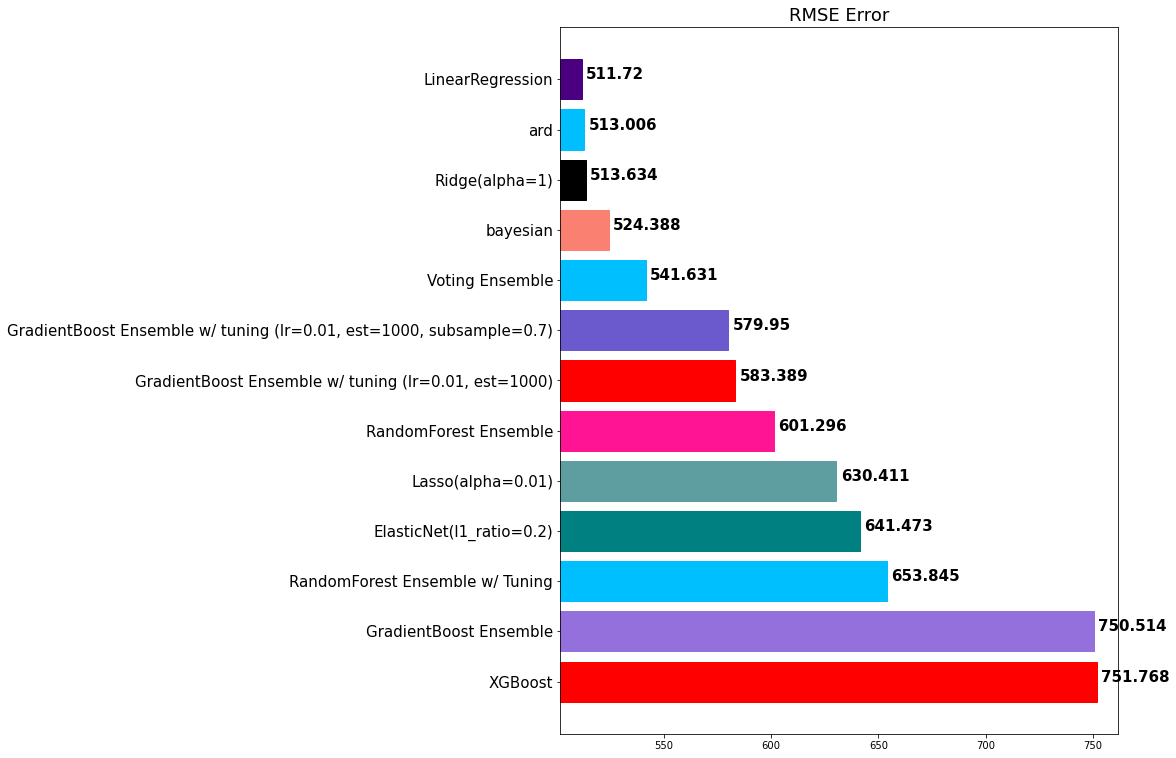

In [42]:
xgb_pred = xgb.predict(X_dev)
rmse_eval('XGBoost', y_dev, xgb_pred)

[12:33:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




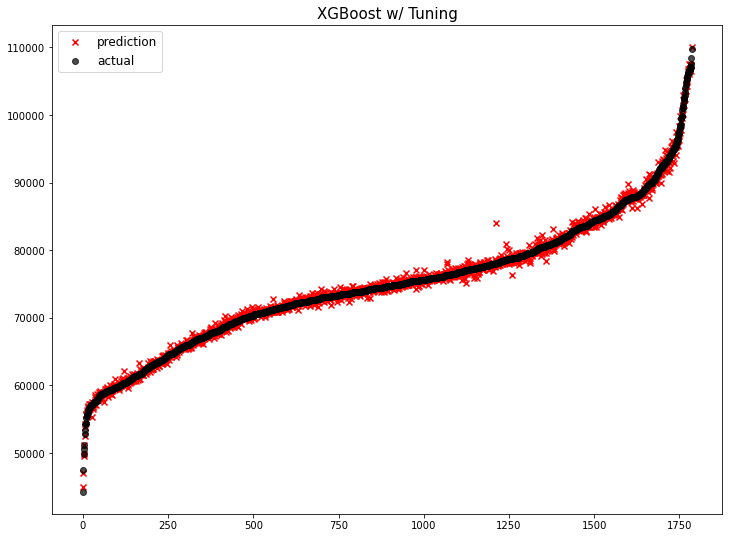

                                                model        rmse
0                                             XGBoost  751.768070
1                              GradientBoost Ensemble  750.514377
2                     RandomForest Ensemble w/ Tuning  653.845099
3                            ElasticNet(l1_ratio=0.2)  641.473180
4                                   Lasso(alpha=0.01)  630.411340
5                               RandomForest Ensemble  601.296241
6   GradientBoost Ensemble w/ tuning (lr=0.01, est...  583.388974
7   GradientBoost Ensemble w/ tuning (lr=0.01, est...  579.949584
8                                   XGBoost w/ Tuning  562.286661
9                                     Voting Ensemble  541.630941
10                                           bayesian  524.388120
11                                     Ridge(alpha=1)  513.634231
12                                                ard  513.006051
13                                   LinearRegression  511.719508


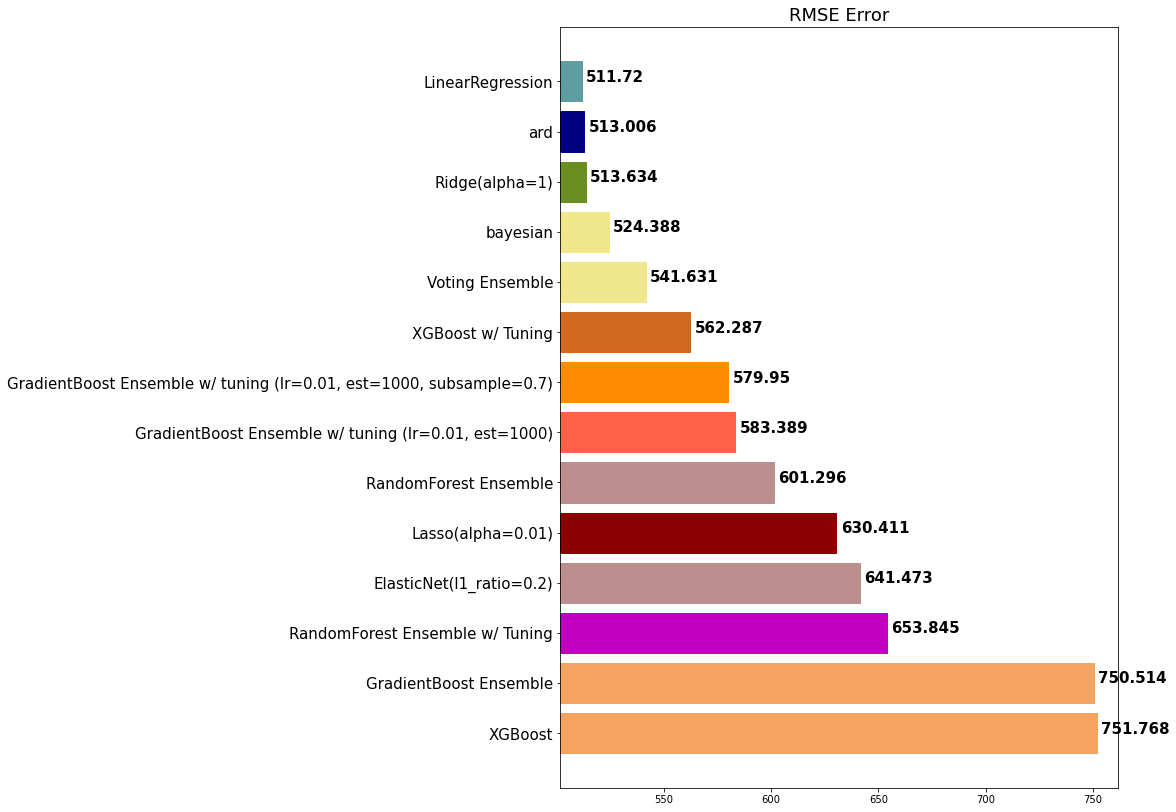

In [43]:
xgb_t = XGBRegressor(random_state=1, learning_rate=0.01, n_estimators=1000, subsample=0.7, max_features=0.8, max_depth=7)
xgb_t.fit(X_train, y_train)
xgb_t_pred = xgb_t.predict(X_dev)
rmse_eval('XGBoost w/ Tuning', y_dev, xgb_t_pred)

LGBM앙상블 회귀버전

In [44]:
lgbm = LGBMRegressor(random_state=1)
lgbm.fit(X_train, y_train)

LGBMRegressor(random_state=1)

In [45]:
LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMRegressor(random_state=1, silent=True)

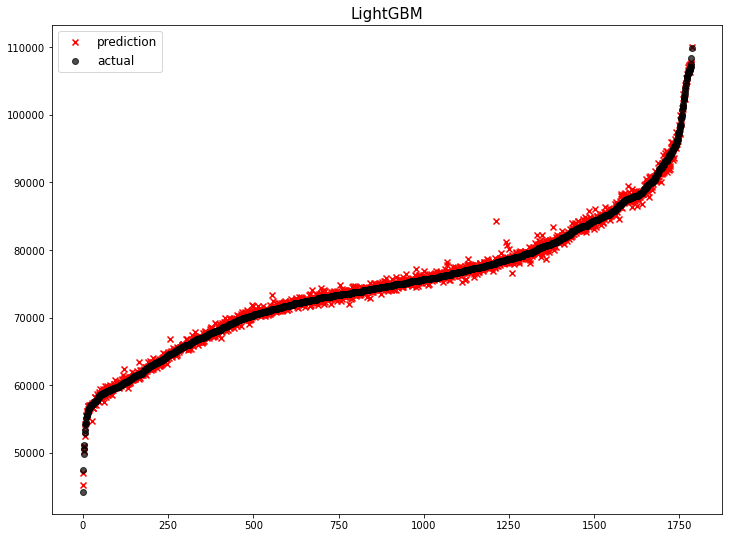

                                                model        rmse
0                                             XGBoost  751.768070
1                              GradientBoost Ensemble  750.514377
2                     RandomForest Ensemble w/ Tuning  653.845099
3                            ElasticNet(l1_ratio=0.2)  641.473180
4                                   Lasso(alpha=0.01)  630.411340
5                               RandomForest Ensemble  601.296241
6   GradientBoost Ensemble w/ tuning (lr=0.01, est...  583.388974
7                                            LightGBM  581.105103
8   GradientBoost Ensemble w/ tuning (lr=0.01, est...  579.949584
9                                   XGBoost w/ Tuning  562.286661
10                                    Voting Ensemble  541.630941
11                                           bayesian  524.388120
12                                     Ridge(alpha=1)  513.634231
13                                                ard  513.006051
14        

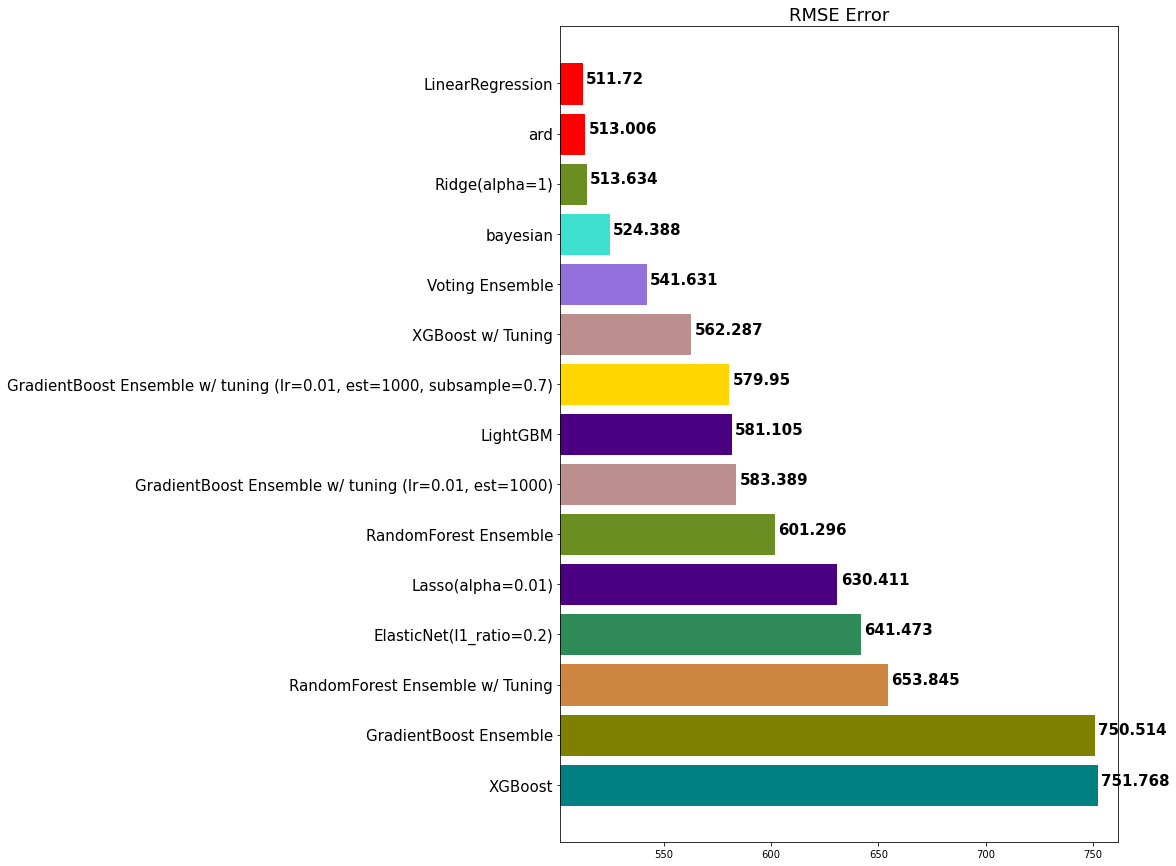

In [46]:
lgbm_pred = lgbm.predict(X_dev)
rmse_eval('LightGBM', y_dev, lgbm_pred)

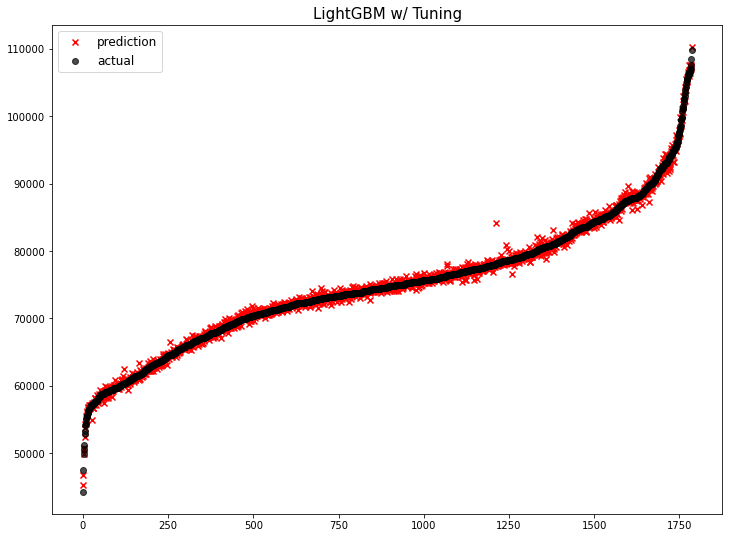

                                                model        rmse
0                                             XGBoost  751.768070
1                              GradientBoost Ensemble  750.514377
2                     RandomForest Ensemble w/ Tuning  653.845099
3                            ElasticNet(l1_ratio=0.2)  641.473180
4                                   Lasso(alpha=0.01)  630.411340
5                               RandomForest Ensemble  601.296241
6   GradientBoost Ensemble w/ tuning (lr=0.01, est...  583.388974
7                                            LightGBM  581.105103
8   GradientBoost Ensemble w/ tuning (lr=0.01, est...  579.949584
9                                  LightGBM w/ Tuning  563.520574
10                                  XGBoost w/ Tuning  562.286661
11                                    Voting Ensemble  541.630941
12                                           bayesian  524.388120
13                                     Ridge(alpha=1)  513.634231
14        

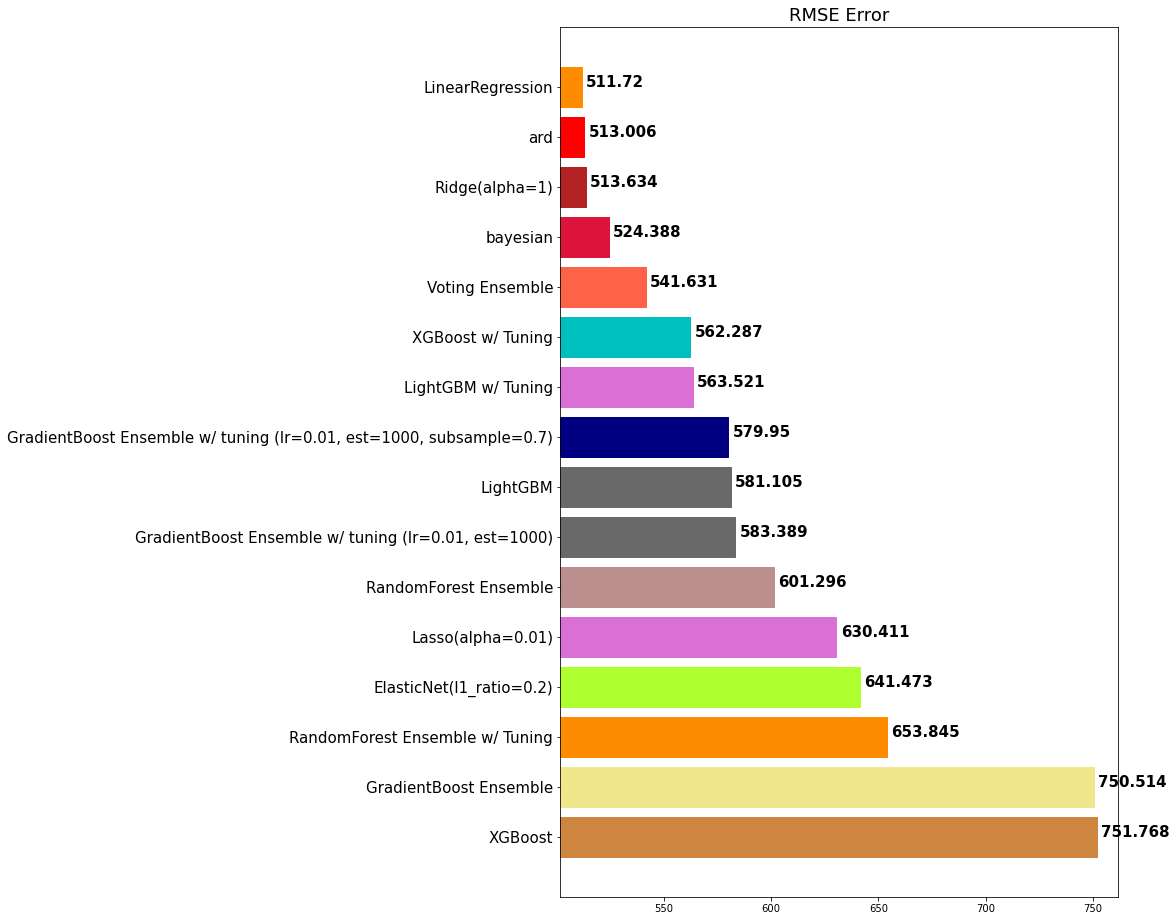

In [47]:
lgbm_t = LGBMRegressor(random_state=1, learning_rate=0.01, n_estimators=1500, colsample_bytree=0.7, subsample=0.7, max_depth=9)
lgbm_t.fit(X_train, y_train)
lgbm_t_pred = lgbm_t.predict(X_dev)
rmse_eval('LightGBM w/ Tuning', y_dev, lgbm_t_pred)

스태킹앙상블(회귀버전)

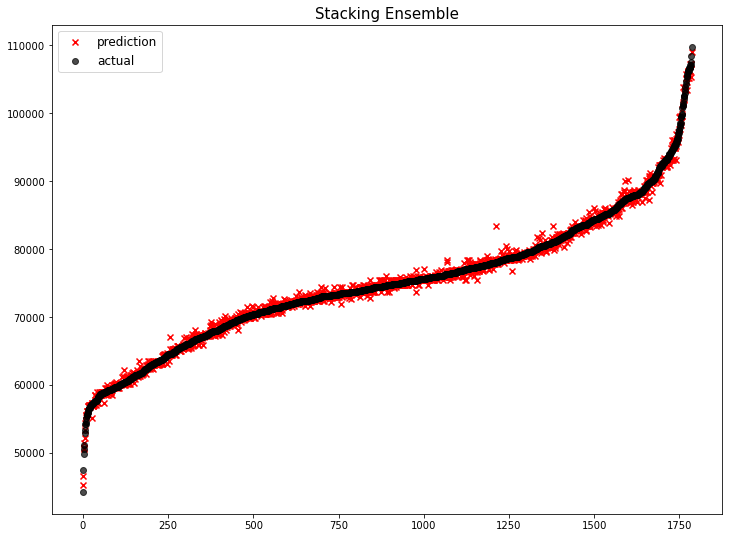

                                                model        rmse
0                                             XGBoost  751.768070
1                              GradientBoost Ensemble  750.514377
2                     RandomForest Ensemble w/ Tuning  653.845099
3                            ElasticNet(l1_ratio=0.2)  641.473180
4                                   Lasso(alpha=0.01)  630.411340
5                               RandomForest Ensemble  601.296241
6   GradientBoost Ensemble w/ tuning (lr=0.01, est...  583.388974
7                                            LightGBM  581.105103
8   GradientBoost Ensemble w/ tuning (lr=0.01, est...  579.949584
9                                   Stacking Ensemble  576.213792
10                                 LightGBM w/ Tuning  563.520574
11                                  XGBoost w/ Tuning  562.286661
12                                    Voting Ensemble  541.630941
13                                           bayesian  524.388120
14        

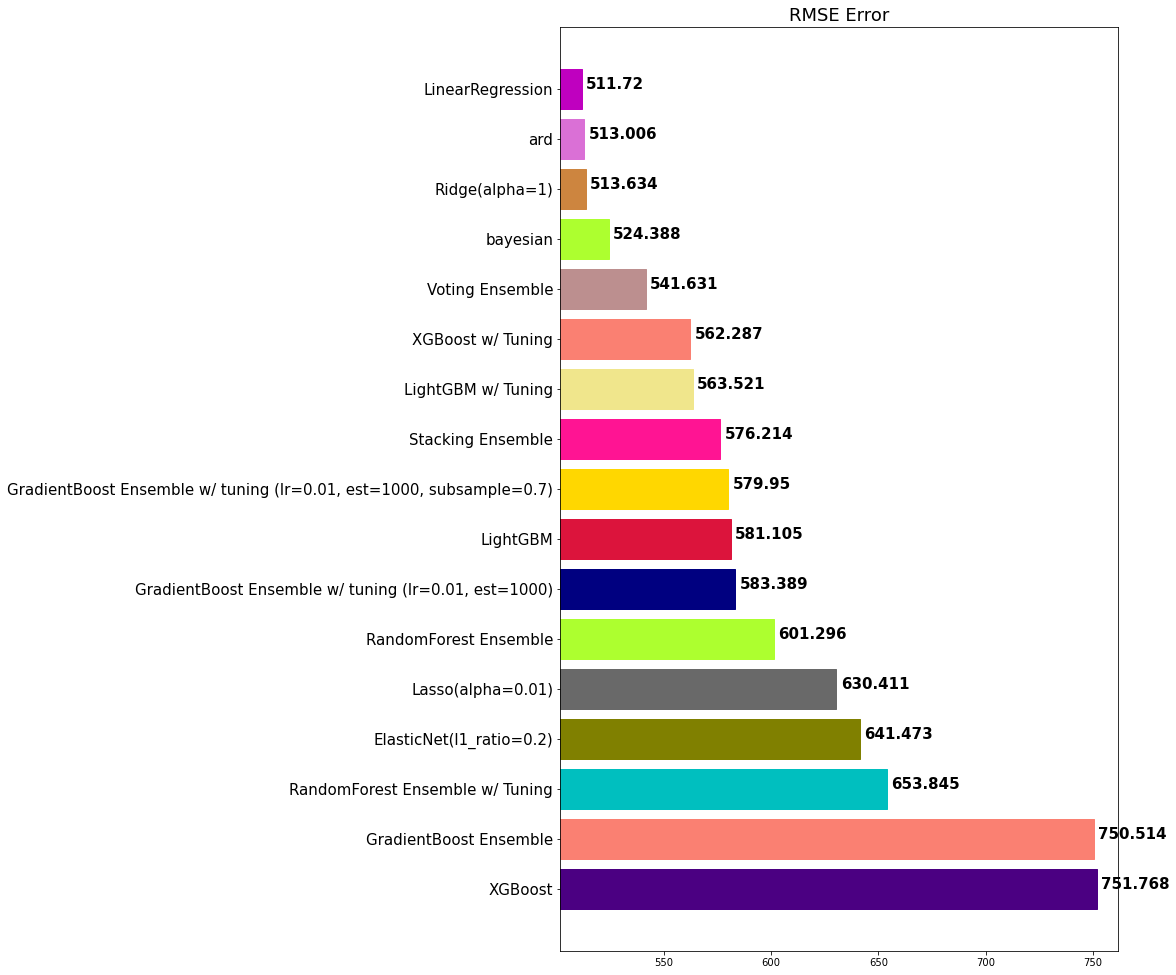

In [48]:
stack_models = [
    ('linear_reg',linear_reg),
    ('ard', ard),
    ('ridge', ridge)]
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)
stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(X_dev)
rmse_eval('Stacking Ensemble', y_dev, stack_pred)

랜덤서치

In [49]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='rmse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

RandomForestRegressor(criterion='rmse', random_state=1)

In [50]:
params = {
    'learning_rate': [0.005, 0.01, 0.03, 0.05],
    'n_estimators': [500, 1000, 2000, 3000],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0],
}

In [51]:
rcv_lgbm = RandomizedSearchCV(LGBMRegressor(), params, random_state=1, cv=5, n_iter=100, scoring='neg_mean_squared_error')
rcv_lgbm.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.005, 0.01, 0.03,
                                                          0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [500, 1000, 2000, 3000],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1, scoring='neg_mean_squared_error')

In [52]:
RandomizedSearchCV(cv=5, #error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           #silen...
                                           subsample_freq=0),
                   #iid='deprecated', 
                   n_iter=100, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.005, 0.01, 0.03,
                                                          0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [500, 1000, 2000, 3000],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.005, 0.01, 0.03,
                                                          0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [500, 1000, 2000, 3000],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1, scoring='neg_mean_squared_error')

In [53]:
rcv_lgbm.best_score_

-38408255.42591146

In [54]:
rcv_lgbm.best_params_

{'subsample': 0.7,
 'n_estimators': 1000,
 'max_depth': 7,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

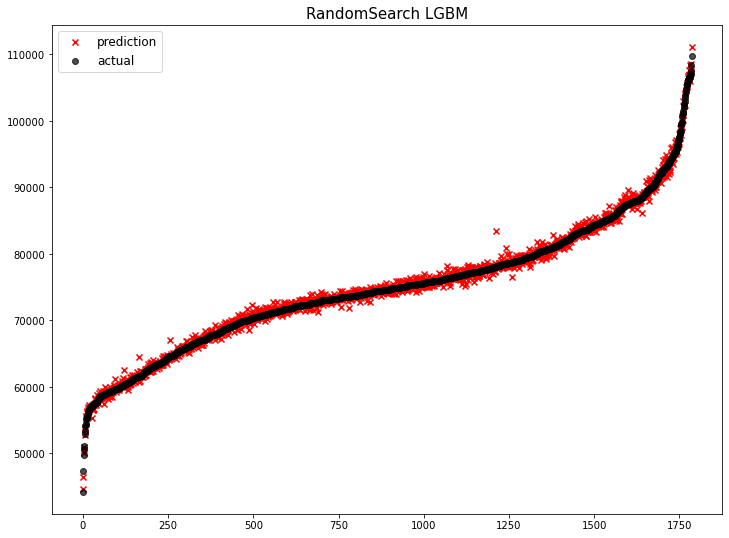

                                                model        rmse
0                                             XGBoost  751.768070
1                              GradientBoost Ensemble  750.514377
2                     RandomForest Ensemble w/ Tuning  653.845099
3                            ElasticNet(l1_ratio=0.2)  641.473180
4                                   Lasso(alpha=0.01)  630.411340
5                               RandomForest Ensemble  601.296241
6                                   RandomSearch LGBM  595.861897
7   GradientBoost Ensemble w/ tuning (lr=0.01, est...  583.388974
8                                            LightGBM  581.105103
9   GradientBoost Ensemble w/ tuning (lr=0.01, est...  579.949584
10                                  Stacking Ensemble  576.213792
11                                 LightGBM w/ Tuning  563.520574
12                                  XGBoost w/ Tuning  562.286661
13                                    Voting Ensemble  541.630941
14        

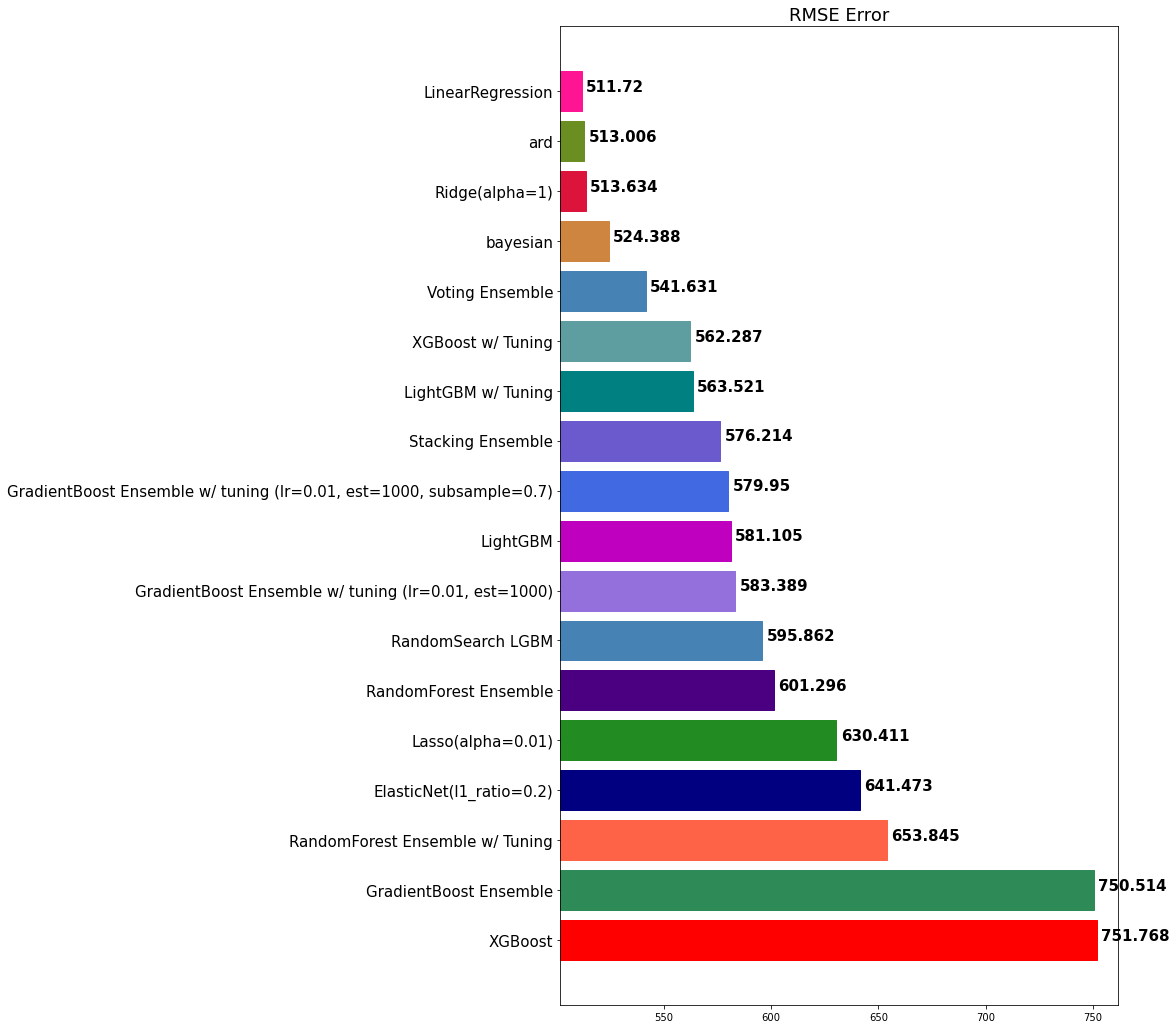

In [55]:
lgbm_best = LGBMRegressor(learning_rate=0.05, n_estimators=1000, subsample=0.8, max_depth=3, colsample_bytree=0.9)
lgbm_best_pred = lgbm_best.fit(X_train, y_train).predict(X_dev)
rmse_eval('RandomSearch LGBM', y_dev, lgbm_best_pred)

그리드서치

In [56]:
params = {
    'learning_rate': [0.04, 0.05, 0.06],
    'n_estimators': [800, 1000, 1200],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.8, 0.85, 0.9],
    'subsample': [0.8, 0.85, 0.9],
}
grid_search = GridSearchCV(LGBMRegressor(), params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.85, 0.9],
                         'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [800, 1000, 1200],
                         'subsample': [0.8, 0.85, 0.9]},
             scoring='neg_mean_squared_error')

In [57]:
GridSearchCV(cv=5, #error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             #iid='deprecated', 
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.85, 0.9],
                         'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [800, 1000, 1200],
                         'subsample': [0.8, 0.85, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

GridSearchCV(cv=5, estimator=LGBMRegressor(silent=True), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.85, 0.9],
                         'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [800, 1000, 1200],
                         'subsample': [0.8, 0.85, 0.9]},
             scoring='neg_mean_squared_error')

In [58]:
grid_search.best_score_

-38417794.79040258

In [59]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.06,
 'max_depth': 5,
 'n_estimators': 1000,
 'subsample': 0.8}

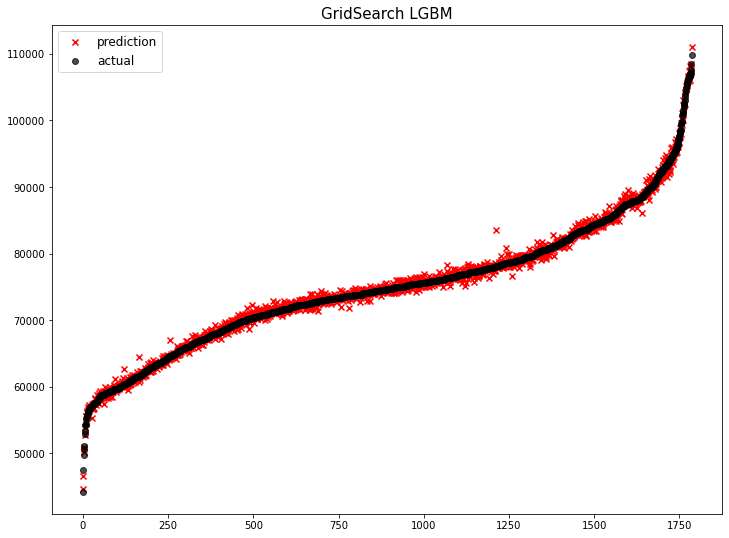

                                                model        rmse
0                                             XGBoost  751.768070
1                              GradientBoost Ensemble  750.514377
2                     RandomForest Ensemble w/ Tuning  653.845099
3                            ElasticNet(l1_ratio=0.2)  641.473180
4                                   Lasso(alpha=0.01)  630.411340
5                               RandomForest Ensemble  601.296241
6                                     GridSearch LGBM  596.567062
7                                   RandomSearch LGBM  595.861897
8   GradientBoost Ensemble w/ tuning (lr=0.01, est...  583.388974
9                                            LightGBM  581.105103
10  GradientBoost Ensemble w/ tuning (lr=0.01, est...  579.949584
11                                  Stacking Ensemble  576.213792
12                                 LightGBM w/ Tuning  563.520574
13                                  XGBoost w/ Tuning  562.286661
14        

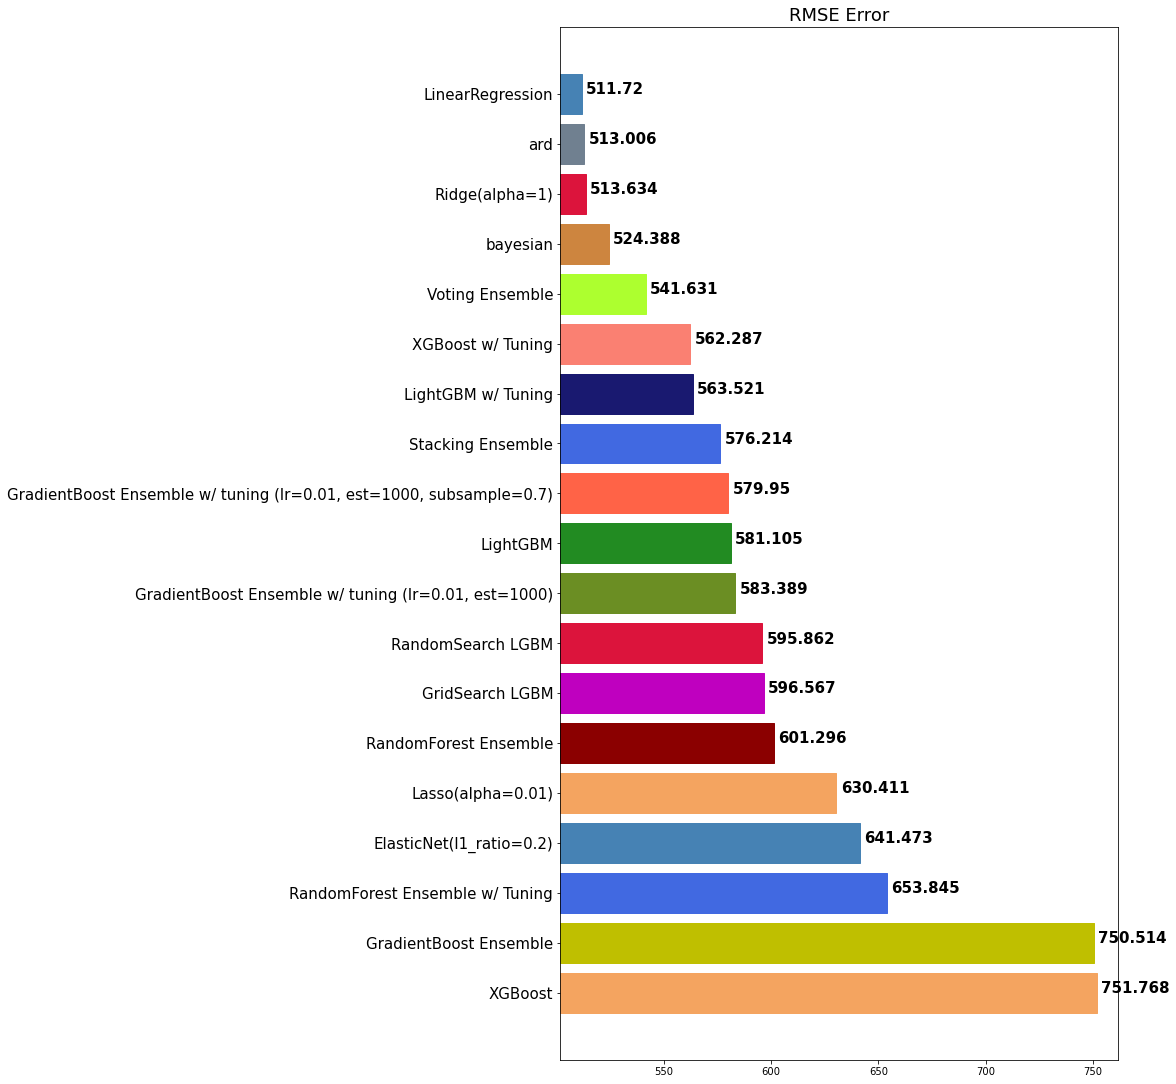

In [60]:
lgbm_best = LGBMRegressor(learning_rate=0.05, n_estimators=800, subsample=0.8, max_depth=3, colsample_bytree=0.9)
lgbm_best_pred = lgbm_best.fit(X_train, y_train).predict(X_dev)
rmse_eval('GridSearch LGBM', y_dev, lgbm_best_pred)

In [61]:
rf = RandomForestRegressor(random_state=0, n_jobs=4)
gbm = GradientBoostingRegressor(random_state=1, learning_rate=0.01, n_estimators=1000,subsample=0.7)
lgbm = lightgbm.LGBMRegressor(random_state=1, learning_rate=0.01, n_estimators=1500, colsample_bytree=0.7, subsample=0.7, max_depth=9)
xgb = XGBRegressor(
    max_depth=15,
    n_estimators=150,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)
lr = LinearRegression(n_jobs=4)
#cb = CatBoostRegressor(random_state=0)
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.2)
ridge = Ridge(alpha=1)
lasso = Lasso()
ard = ARDRegression()
bayesian = BayesianRidge()

models = [rf, gbm, lgbm, xgb, lr , ridge,lasso,ard, bayesian,elasticnet]

In [ ]:
models = [rf, gbm, lgbm, xgb, lr , ridge,lasso,ard, bayesian,elasticnet,stack_reg,voting_regressor]
cv_scores = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=25), scoring='r2')
    cv_scores.append(scores)
    print(f'{model.__class__.__name__}, \n최고성능: {max([score for scoreArr in cv_scores for score in scoreArr])}\n평균성능: {np.mean(cv_scores)}\n')
    #\ncv성능들: {cv_scores}

RandomForestRegressor, 
최고성능: 0.9980763303458707
평균성능: 0.9021274098785029



In [ ]:
models = [rf, gbm, lgbm, xgb, lr , ridge,lasso,ard, bayesian,elasticnet,stack_reg,voting_regressor]
cv_scores = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=20), scoring='r2')
    cv_scores.append(scores)
    print(f'{model.__class__.__name__}, \n최고성능: {max([score for scoreArr in cv_scores for score in scoreArr])}\n평균성능: {np.mean(cv_scores)}\n')
    #\ncv성능들: {cv_scores}